#### Random Forest- churn dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import tensorflow as tf #open source framework that helps to train and test neural network models to make predictions

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.19.5
1.1.5
0.11.2


#### Pre-processing

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [ ]:
dataset.shape

(10000, 14)

checking null values

In [ ]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


In [ ]:
dataset.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
dataset.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
dataset.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Visualization of data

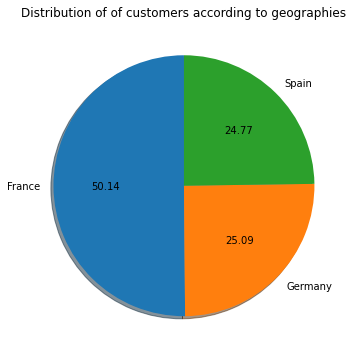

In [ ]:
plt.figure(figsize = (10,6))
v = dataset['Geography'].value_counts()
label = ['France', 'Germany', 'Spain']
plt.pie(v, labels = label, autopct = '%0.02f', radius = 1,shadow= True, startangle = 90)
plt.title('Distribution of of customers according to geographies')
plt.show()

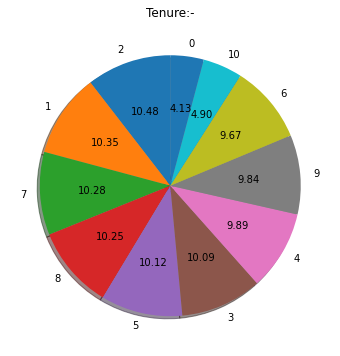

In [ ]:
plt.figure(figsize = (10,6))
v = dataset['Tenure'].value_counts()
label = [2,1,7,8,5,3,4,9,6,10,0]
plt.pie(v, labels = label, autopct = '%0.02f', radius = 1,shadow= True, startangle = 90)
plt.title('Tenure:-')
plt.show()

In [ ]:
dataset.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

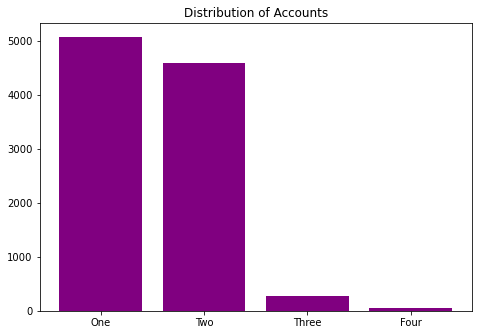

In [ ]:
Accounts = ['One', 'Two', 'Three', 'Four']
NumberOfAccounts = [5084, 4590, 266, 60]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Accounts,NumberOfAccounts, color = 'purple')
plt.title('Distribution of Accounts')
plt.show()

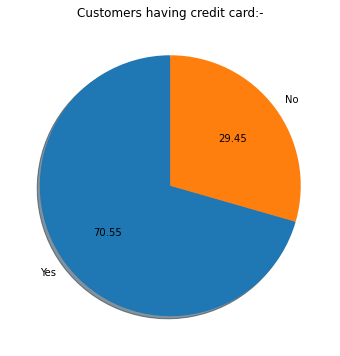

In [ ]:
plt.figure(figsize = (10,6))
v = dataset['HasCrCard'].value_counts()
label = ['Yes', 'No']
plt.pie(v, labels = label, autopct = '%0.02f', radius = 1,shadow= True, startangle = 90)
plt.title('Customers having credit card:-')
plt.show()

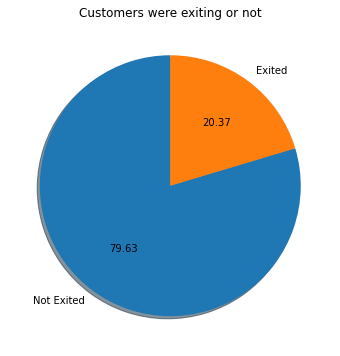

In [ ]:
plt.figure(figsize = (10,6))
v = dataset['Exited'].value_counts()
label = ['Not Exited','Exited']
plt.pie(v,labels = label, autopct = '%0.02f', radius = 1, shadow=True, startangle = 90)
plt.title('Customers were exiting or not')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

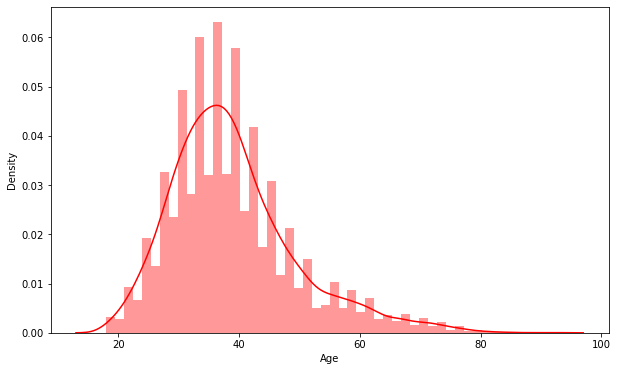

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(dataset['Age'], color='r')

    Geography Vs Age

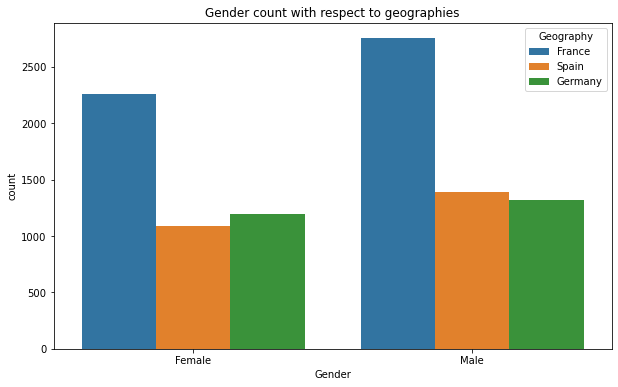

In [ ]:
plt.figure(figsize= (10,6))
sns.countplot(x ='Gender' ,data = dataset, hue='Geography')
plt.title('Gender count with respect to geographies')
plt.show()

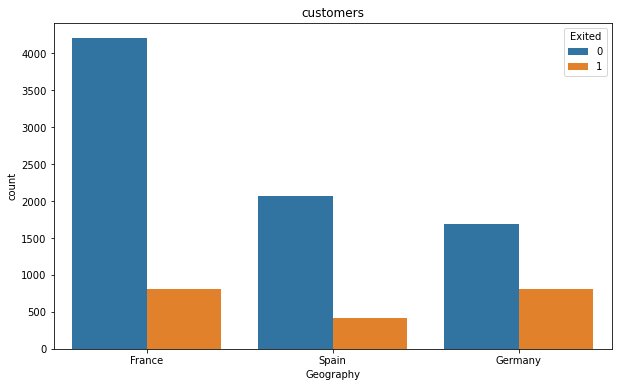

In [ ]:
plt.figure(figsize =(10,6))
sns.countplot(data = dataset, x = 'Geography', hue='Exited')
plt.title('customers')
plt.show()

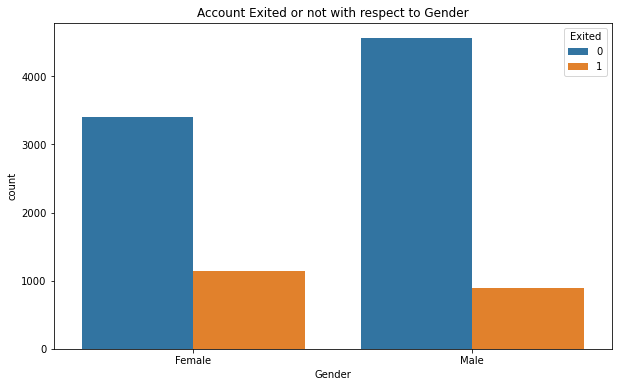

In [ ]:
plt.figure(figsize =(10,6))
sns.countplot(data = dataset, x = 'Gender', hue='Exited')
plt.title('Account Exited or not with respect to Gender')
plt.show()

from above graph we can understand that number of males and females are staying with the bank

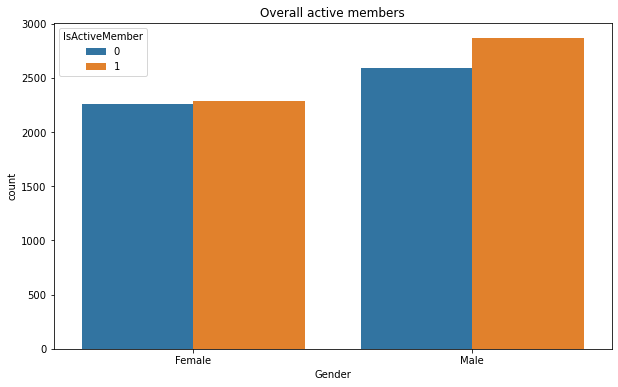

In [ ]:
plt.figure(figsize =(10,6))
sns.countplot(data = dataset, x = 'Gender', hue='IsActiveMember')
plt.title('Overall active members')
plt.show()

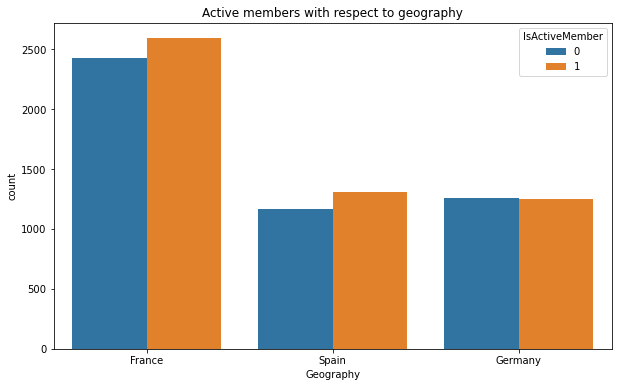

In [ ]:
plt.figure(figsize =(10,6))
sns.countplot(data = dataset, x = 'Geography', hue='IsActiveMember')
plt.title('Active members with respect to geography')
plt.show()

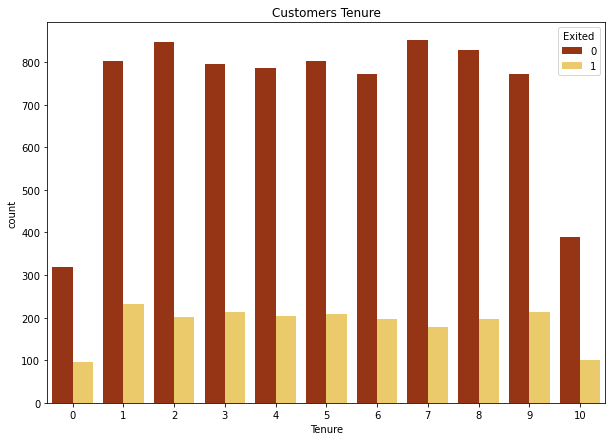

In [ ]:
plt.figure(figsize =(10,7))
sns.countplot(data = dataset, x = 'Tenure', hue='Exited', palette = 'afmhot')
plt.title('Customers Tenure')
plt.show()

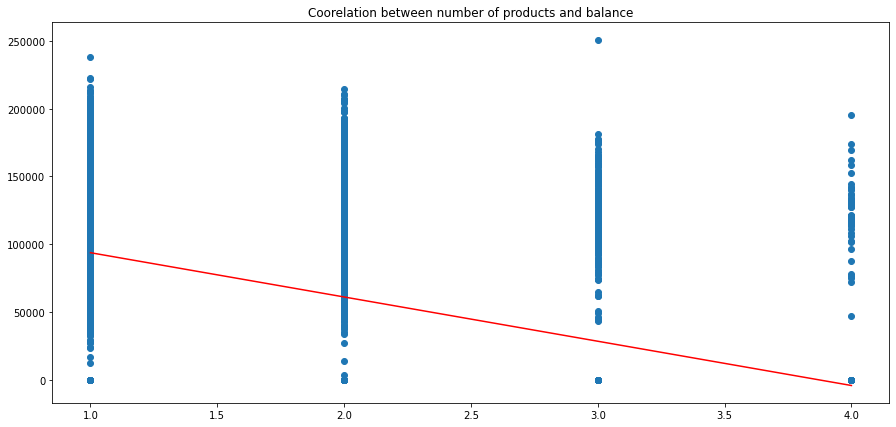

In [ ]:
plt.figure(figsize =(15,7))
bal = dataset['NumOfProducts']
age = dataset['Balance']
plt.scatter(bal, age)
plt.title('Coorelation between number of products and balance')
# This will fit the best line into the graph
plt.plot(np.unique(bal), np.poly1d(np.polyfit(bal, age, 1))
         (np.unique(bal)), color='red')

from above graph it can be understood that as the number of accounts increases the balance income decreases that is negatively correlated

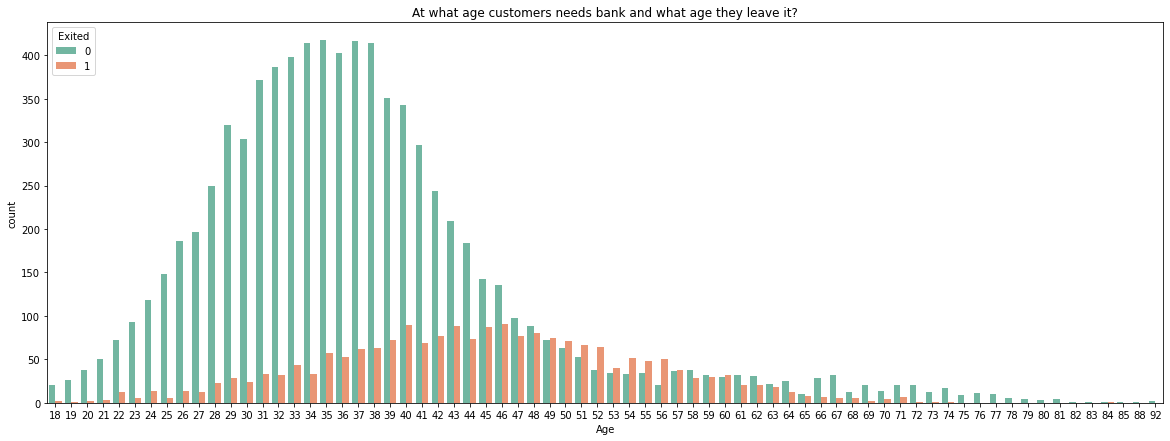

In [ ]:
plt.figure(figsize =(20,7))
sns.countplot(data = dataset, x = 'Age', hue='Exited', palette = 'Set2')
plt.title('At what age customers needs bank and what age they leave it?')
plt.show()

# Select features for data modeling

In [6]:
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values
print(X)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


Encoding the categorical columns:
1. Label encoder: if you have 2 categories which may or may not be in order then you use label encoder
2. One hot encoder: more that a number of categories you use one hot encoding which that you are a value in the row into a column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])
print("encoding gender feature using Label Encoder:-")
print(X)

encoding gender feature using Label Encoder:-
[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print("encoding geography feature using One HotEncoder:-")
print(X)

encoding geography feature using One HotEncoder:-
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


Train test set:- to train and validate the model

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Feature Scaling: to give accuracies in pretty good manner

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Build our first ANN model

In [11]:
ann = tf.keras.models.Sequential()
#hidden layer 1
ann.add(tf.keras.layers.Dense(units =3, activation='relu'))
#hidden layer 2
ann.add(tf.keras.layers.Dense(units = 3, activation ='relu'))
#hidden layer 3
#ann.add(tf.keras.layers.Dense(units = 3, activation ='relu'))
#output layer
ann.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid'))

In [12]:
#to get all the layers together and create a network till now the every thing is added separately but everything has to know that 
#they are part of network so it compiles all the 
ann.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [13]:
#ann
ann.fit(X_train, y_train, batch_size =32, epochs=100)

Epoch 1/100
235/235 [==============================] - 1s 953us/step - loss: 0.6999 - accuracy: 0.6320
Epoch 2/100
235/235 [==============================] - 0s 964us/step - loss: 0.5318 - accuracy: 0.7967
Epoch 3/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7968
Epoch 4/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8028
Epoch 5/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8163
Epoch 6/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8276
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8352
Epoch 8/100
235/235 [==============================] - 0s 969us/step - loss: 0.3881 - accuracy: 0.8380
Epoch 9/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3800 - accuracy: 0.8420
Epoch 10/100
235/235 [==============================] - 0s 991us/step - loss: 0.3737 

In [14]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy = ",accuracy)

[[1923   68]
 [ 279  230]]
Accuracy =  0.8612
